
<h1>Global Food Waste Analysis</h1> 

## Introduction

### <i>If just one fourth of lost or wasted food were saved, it could end global hunger.</i> 
         

Have you ever heard that 


According to the Food and Agriculture Organization of the United Nations (FAO), the world loses a third of the food it produces. It is claim 


Wasted food requires energy, land, water and labor to produce, store, harvest, transport, package and sell. When we toss out food, we’re throwing away precious resources that could have been used to feed hungry people. And all that rotting food produces three billion tons of greenhouse gases like methane, directly contributing to climate change.

Have you ever heard one third of the Food produced is wasted 


How many times have you heard one third of the food 

Food loss 

The Food Loss and Waste database is the largest online collection of data on both food loss and food waste and causes reported in scientific journals, academic publications, grey literature, countries among others. The database contains data and information from openly accessible databases, reports and studies measuring food loss and waste across food products, stages of the value chain, and geographical areas.

- 5 commodities wuth largest waste
- 5 countries with largest percentage waste 
- 5 correlation between features 
- 5 countries better reducing waste 

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In this project we are using data from the Food and Agriculture Organization of the United Nations. This particular set of data is downloadable at http://www.fao.org/platform-food-loss-waste/flw-data/en/.

In [2]:
df = pd.read_csv('Data6522.csv')


/home/proctor/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.tail(50)

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
32897,894,Zambia,NaN,118,Millet,2001,3.44,3.44,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32898,894,Zambia,NaN,111,Wheat,2000,2.00,2,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32899,894,Zambia,NaN,111,Wheat,2000,1.30,1.3,NaN,Storage,Storage,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32900,894,Zambia,NaN,111,Wheat,2000,5.75,5.75,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32901,894,Zambia,NaN,111,Wheat,2000,1.00,1,NaN,Transportation,Transport,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32902,894,Zambia,NaN,112,Maize (corn),2000,3.90,3.9,NaN,Drying,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32903,894,Zambia,NaN,112,Maize (corn),2000,2.31,2.31,NaN,Transportation,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32904,894,Zambia,NaN,112,Maize (corn),2000,4.49,4.49,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32905,894,Zambia,NaN,112,Maize (corn),2000,1.26,1.26,NaN,Transportation,Transport,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
32906,894,Zambia,NaN,112,Maize (corn),2000,5.91,5.91,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN


In [4]:
df.columns

Index(['m49_code', 'country', 'region', 'cpc_code', 'commodity', 'year',
       'loss_percentage', 'loss_percentage_original', 'loss_quantity',
       'activity', 'food_supply_stage', 'treatment', 'cause_of_loss',
       'sample_size', 'method_data_collection', 'reference', 'url', 'notes'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32947 entries, 0 to 32946
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   m49_code                  32947 non-null  int64  
 1   country                   32947 non-null  object 
 2   region                    974 non-null    object 
 3   cpc_code                  32947 non-null  object 
 4   commodity                 32947 non-null  object 
 5   year                      32947 non-null  int64  
 6   loss_percentage           32947 non-null  float64
 7   loss_percentage_original  32947 non-null  object 
 8   loss_quantity             7444 non-null   object 
 9   activity                  21036 non-null  object 
 10  food_supply_stage         32875 non-null  object 
 11  treatment                 971 non-null    object 
 12  cause_of_loss             1177 non-null   object 
 13  sample_size               1307 non-null   object 
 14  method

In [6]:
df.nunique()

m49_code                     157
country                      158
region                       180
cpc_code                     195
commodity                    202
year                          55
loss_percentage             2232
loss_percentage_original    3769
loss_quantity               4526
activity                     120
food_supply_stage             19
treatment                    305
cause_of_loss                483
sample_size                  230
method_data_collection        11
reference                    444
url                          125
notes                        162
dtype: int64

In [7]:
df.drop(['region','treatment','loss_quantity','region','url','cause_of_loss','reference','sample_size','notes'],axis=1,inplace=True)


In [8]:
df.head()

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
0,104,Myanmar,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,NaN,Whole supply chain,FAO's annual Agriculture Production Questionna...
1,104,Myanmar,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,NaN,Whole supply chain,FAO's annual Agriculture Production Questionna...
2,104,Myanmar,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,NaN,Whole supply chain,FAO's annual Agriculture Production Questionna...
3,104,Myanmar,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,NaN,Whole supply chain,FAO's annual Agriculture Production Questionna...
4,104,Myanmar,0142,"Groundnuts, excluding shelled",2005,5.00,5%,NaN,Whole supply chain,FAO's annual Agriculture Production Questionna...


In [9]:
#Replace nans with string of unknown and show head
df = df.replace(float('nan'), "Unknown")
df.head()

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
0,104,Myanmar,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
1,104,Myanmar,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
2,104,Myanmar,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
3,104,Myanmar,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...
4,104,Myanmar,0142,"Groundnuts, excluding shelled",2005,5.00,5%,Unknown,Whole supply chain,FAO's annual Agriculture Production Questionna...


## Exploratory Data Analysis


Loss Percentage = Food loss as a percentage of domestic production. 

First, we will plot percent loss versus year on a scatter plot.

In [10]:
df.describe()

,m49_code,year,loss_percentage
count,32947.000000,32947.000000,32947.000000
mean,490.287978,2006.743952,5.151613
std,267.932473,9.317634,6.957487
min,2.000000,1966.000000,0.003000
25%,250.000000,2002.000000,1.650000
50%,478.000000,2008.000000,2.910000
75%,729.000000,2014.000000,5.000000
max,894.000000,2021.000000,65.000000


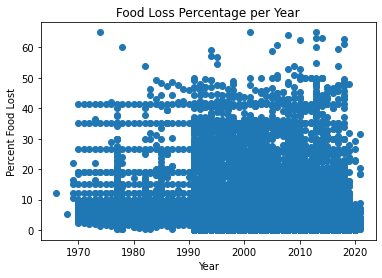

In [11]:
# Evaluate Food Loss over Time

#Create x and y and plot
x = df['year']
y = df['loss_percentage']

plt.plot(x,y,'o')
plt.title('Food Loss Percentage per Year')
plt.xlabel('Year')
plt.ylabel('Percent Food Lost')
plt.show()





In [12]:
df['decades'] = (10 * (df['year'] // 10))
# x = df['decades']


# plt.plot(x,y,'o')
# plt.title('Food Loss Percentage per Year')
# plt.xlabel('Year')
# plt.ylabel('Percent Food Lost')
# plt.show()

[Text(0, 0, '1960s'),
 Text(1, 0, '1970s'),
 Text(2, 0, '1980s'),
 Text(3, 0, '1990s'),
 Text(4, 0, '2000s'),
 Text(5, 0, '2010s'),
 Text(6, 0, '2020s')]

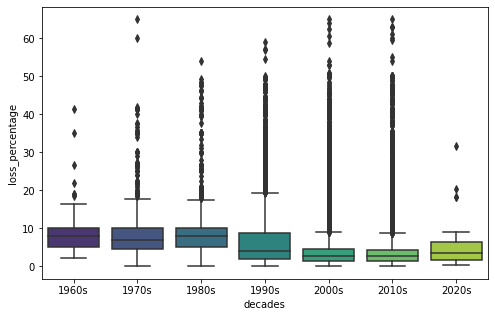

In [13]:
df['decades'] = pd.cut(df['year'], bins=range(1960, 2040, 10))
plt.figure(figsize=(8,5))
ax = sns.boxplot(x="decades", y="loss_percentage", data=df, palette = "viridis")
# ax.set_xticks([0, 1, 2, 3, 4, 5, 6 ], labels=["1960s", "1970s", "1980s", "1990s", "2000s", "2010s"])
ax.set_xticklabels(["1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020s"])


Data shows that in recent years, Food loss porcentage has decreased. Our initial thoughts on the data hold true, and it is clearly shown now. The interquartile range (where the center 50 percent of the data lies) expands and increases from 1960 to 1980, then contracts and decreases from 1980 to 2020, with a slight increase in the current decade. 

Our earlier graph showed strong clusters below 20 percent in recent years. This new visualization shows us that more recent data is actually highly concentrated below 10 percent. This clarification shows that current food waste incidents have historically very low loss percentages. 

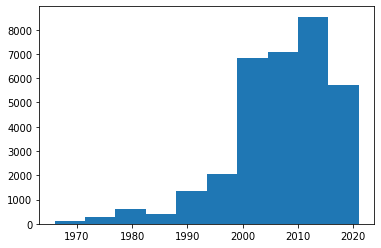

In [14]:
#Make histogram of year
x = df['year']
y = df['loss_percentage']
plt.hist(x)
plt.show()

As the histogram shows, while percent loss of any incident has decreased significantly from its height, the number of incidents seems to be very high historically. Historically 



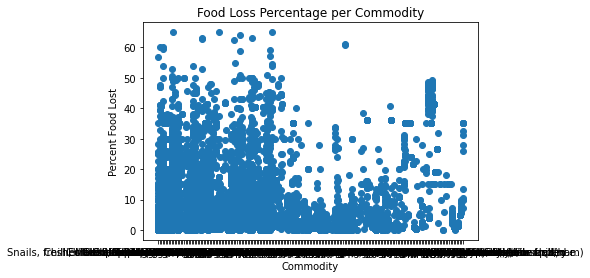

In [15]:
#Evaluate Commodities with largest waste 

#5 commodities with largest waste
x = df['commodity']
y = df['loss_percentage']


plt.plot(x,y,'o')
plt.title('Food Loss Percentage per Commodity')
plt.xlabel('Commodity')
plt.ylabel('Percent Food Lost')
plt.show()



We have now run into a problem. There are far too many crops to reasonably plot together. We could do many things to work around this problem such as creating categories and sorting those crops into those categories, creating many different plots, or by limiting which crops we look at.

## Commodity Groups

In [16]:
#Convert type to string
df['cpc_code'] = df['cpc_code'].astype(str)

In [17]:
df['category'] = ['Other crops (stimulants, spices, sugar, etc.)' if cpc.startswith(('0137', '016','018', '029')) 
                  else 'Cereals & Pulses' if cpc.startswith(('11', '23','17'))
                  else 'Fruits And Vegetables' if cpc.startswith(('012', '013','211'))
                  else 'Animals products; Fish and fish products' if cpc.startswith('21')
                  else 'Roots, Tubers & Oil-Bearing Crops'
                  for cpc in df['cpc_code']]
df.tail()

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection,decades,category
32942,894,Zambia,112,Maize (corn),1977,4.05,1.7-6.4,Unknown,Storage,Case Study,"(1970, 1980]",Cereals & Pulses
32943,894,Zambia,112,Maize (corn),1977,3.00,3,Unknown,Storage,Case Study,"(1970, 1980]",Cereals & Pulses
32944,894,Zambia,112,Maize (corn),1977,3.50,2.0-5,Unknown,Storage,Case Study,"(1970, 1980]",Cereals & Pulses
32945,894,Zambia,112,Maize (corn),1977,13.00,13,Unknown,Storage,Case Study,"(1970, 1980]",Cereals & Pulses
32946,894,Zambia,112,Maize (corn),1977,9.00,9,Unknown,Storage,Case Study,"(1970, 1980]",Cereals & Pulses


In [18]:
df['category'].nunique()

5

In [19]:
#Download Database with Commodity Groups
df.to_csv('dfcategory2.csv', encoding='utf-8', index=False)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Roots, Tubers & Oil-Bearing Crops'),
  Text(1, 0, 'Fruits And Vegetables'),
  Text(2, 0, 'Other crops (stimulants, spices, sugar, etc.)'),
  Text(3, 0, 'Cereals & Pulses'),
  Text(4, 0, 'Animals products; Fish and fish products')])

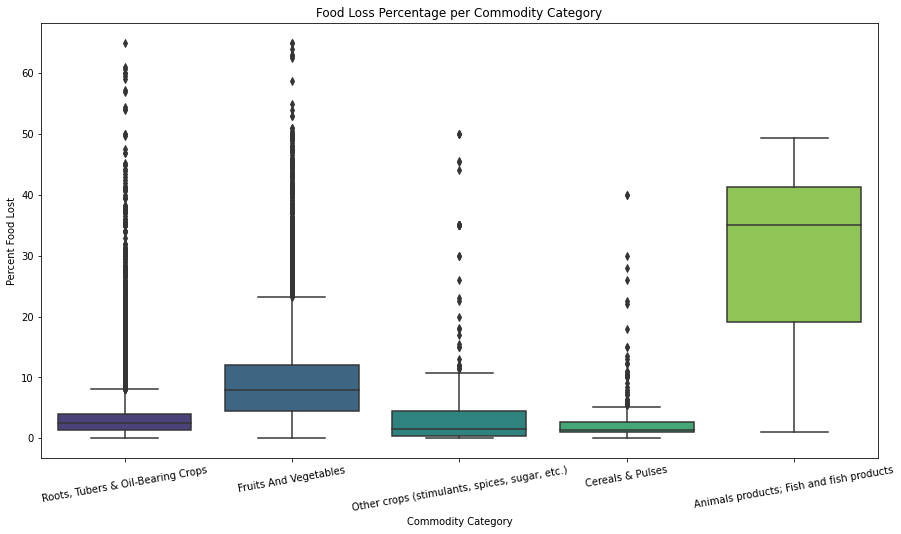

In [20]:
#Create appropriate x and y and plot with dots
x = df['category']
y = df['loss_percentage']
plt.figure(figsize=(15,8))

ax = sns.boxplot(x="category", y="loss_percentage", data=df, palette = "viridis")

# plt.plot(x,y,'o')
plt.title('Food Loss Percentage per Commodity Category')
plt.xlabel('Commodity Category')
plt.ylabel('Percent Food Lost')
plt.xticks(rotation=10)


Animals have the more percent loss

In [21]:
df_cat_mean = df.groupby('category')['loss_percentage'].mean()


In [22]:
df_cat

NameError: name 'df_cat' is not defined

In [ ]:
df_cat_fq = df['category'].value_counts()
pd.DataFrame(df_cat_fq)

In [ ]:
#More frequent 
df_com_fq = df['commodity'].value_counts()
pd.DataFrame(df_com_fq).head(10)

In [ ]:
df_country_fq = df['country'].value_counts()
pd.DataFrame(df_country_fq).head(10)

In [ ]:
df

In [ ]:


search_df = df.loc[df['year'] ==2011]
search_df.head(3)



In [ ]:
search_df['loss_percentage'].mean()

In [ ]:
search_com_df = df.loc[df['commodity'] =='Pineapple juice']
search_com_df


Categories

1. Cereals & Pulses; ('11','23','17')
2. Fruits And Vegetables;('',
3. Roots, Tubers & Oil-Bearing Crops;
4. Animals products; Fish and fish products
5. Other crops (stimulants, spices, sugar, etc.)

## Food Supply Stage

In [ ]:
sorted_df = df.sort_values(by='loss_percentage',ascending=True)
sorted_df

In [ ]:
df_sorted_supply = pd.DataFrame(df.groupby('food_supply_stage')['loss_percentage'].mean().sort_values(ascending=False)).reset_index()
plt.figure(figsize=(14,7))
ax = sns.barplot(x="food_supply_stage", y="loss_percentage", data=df_sorted_supply, palette = "viridis")
plt.xticks(rotation=30)


According to the data, the largest food loss occurs at the Post Harvest, Household and Market stages.


Also, it is worth noting that there is incomplete or 'Unknown' data to determine at what stage significant food loss happens. 
 

In [ ]:
df_stage_fq = df['food_supply_stage'].value_counts()
df_stage_fq

In [ ]:
pip install openpyxl

In [ ]:
groups_df = pd.read_csv ('CPC21.csv')
groups_df

In [ ]:
df_com = df.groupby('commodity')['loss_percentage'].mean()


In [ ]:
df_com  = pd.DataFrame(df_com)

In [ ]:
df_com.sort_values(by=['loss_percentage'], ascending = False)


In [ ]:

sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
#df.sort_values(by=["commodity"]) 

In [ ]:
# df['year']='2021'
# df

In [ ]:
df.shape

In [ ]:
country_df = df.groupby('country')['commodity']['loss_quantity']
pd.DataFrame(country_df)

In [ ]:
year_df = df.groupby('year')['loss_quantity']
pd.DataFrame(year_df)

In [ ]:
country_df.plot(kind="bar")

Comments and limitations:
Food losses are an extremely complex phenomenon to measure because they are multi-dimensional and
data collection is costly.
A major limitation is data availability. The reported data accounts for a small percentage or the data
needs: only 23 countries out of 185 reported on losses in 2016 for one commodity or more and only 4.4%
of loss factors in the SUA/FBS database are officially reported, all others being estimated
The index is limited in scope as harvest losses cannot be included in the international indicator for
comparability reasons. Moreover, the index covers ten key commodities in each country, because
requesting regular loss data for a larger number of crops would be a difficult and unsustainable exercise
for most countries.
The index covers quantitative losses only, that challenging enough to measure. Qualitative and economic
losses are also very relevant but less consistent out of the scope of the indicator.
This indicator is particularly challenging for countries because it requires several surveys to collect all the
necessary information along the supply chain. The most appropriate data sources would be an ensemble
of surveys however, most countries lack the capacity and resources to carry out this exercise. A suite of
statistical and modelling tools, combined where possible with administrative records will have to be used.

Moving from global food loss and waste estimates to the commodity, country, and stage level will vastly improve our knowledge of the food losses problem and present opportunities for intervention.

In [ ]:
df_fao = pd.read_excel('faoStats.xlsx')
df_fao

In [ ]:
df_fao.to_csv('csvfile.csv', encoding='utf-8', index=False)


Hypothesis

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
df.tail()

## Method of Data Collection        

In [ ]:
x = df['method_data_collection']
y = df['loss_percentage']


plt.plot(x,y,'o')
plt.title('Food Loss Percentage per Commodity')
plt.xlabel('Commodity')
plt.ylabel('Percent Food Lost')
plt.show()

In [ ]:
df_method = df['method_data_collection'].value_counts()
df_method

In [ ]:
df.sample(5)

## COMMODITY BASKETS CLASSIFICATION

In [23]:
df_fao_codes = pd.read_csv('FLI Commodity Baskets and corresponding CPC codes (Annex 2) - Table 12.csv') 


In [24]:
df_fao_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Annex 2: FLI Commodity Baskets and corresponding CPC codes  6 non-null      float64
 1   Unnamed: 1                                                  7 non-null      object 
 2   Unnamed: 2                                                  16 non-null     object 
 3   Unnamed: 3                                                  17 non-null     object 
dtypes: float64(1), object(3)
memory usage: 672.0+ bytes


In [25]:
df_fao_codes.head(5)

,Annex 2: FLI Commodity Baskets and corresponding CPC codes,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,GFLI Basket,FBS Group,Crop (CPC Heading)
1,1.0,Cereals & Pulses,Cereals,"Wheat (111), Maize (Corn) (112), Rice (113), S..."
2,NaN,NaN,Pulses,"Beans, Dry (1701), Broad Beans And Horse..."
3,2.0,Fruits & Vegetables,Fruits,"Avocados (1311), Bananas (1312), Plantains And..."
4,NaN,NaN,Vegetables,"Asparagus (1211), Cabbages (1212), Cauliflower..."


In [26]:
df_fao_codes.columns = ['Index','GFLI Basket', 'FBS Group', 'Crop']

In [27]:
df_fao_codes.sample(2)

,Index,GFLI Basket,FBS Group,Crop
7,4.0,Animals And Animal Products,Animal fats,"Fat Of Pigs (21511.01), Pig, Butcher Fat (2151..."
6,NaN,NaN,"Roots, Tubers &\nProducts","Potatoes (1510), Cassava, Fresh (1520.01),..."


In [28]:
import re

# cpc_codes = df_fao_codes['Crop'].str.extractall(r'(\(\d)')
# cpc_codes = df_fao_codes['Crop'].str.extractall('\^(.*?)),/')

new_fao = df_fao_codes['Crop'].str.split("\)\,", expand = False)

In [29]:
df_new_fao = pd.DataFrame(new_fao.explode())

In [30]:
# cpc = df_new_fao['Crop'].str.findall('[0-9]+')
# cpc = df_new_fao['Crop'].str.findall('(\d+\.?\d*)')
cpc = df_new_fao['Crop'].str.extract('(\d+\.?\d*)')

In [31]:
cpc

,0
0,NaN
1,111
1,112
1,113
1,114
...,...
16,21423
16,21424
16,21429.01
16,21429.02


In [32]:
cpc[0]

0          NaN
1          111
1          112
1          113
1          114
        ...   
16       21423
16       21424
16    21429.01
16    21429.02
16        0235
Name: 0, Length: 277, dtype: object

In [33]:
df_new_fao

,Crop
0,Crop (CPC Heading)
1,Wheat (111
1,Maize (Corn) (112
1,Rice (113
1,Sorghum (114
...,...
16,"Hazelnuts, Shelled (21423"
16,"Cashew Nuts, Shelled (21424"
16,"Brazil Nuts, Shelled (21429.01"
16,"\nWalnuts, Shelled (21429.02"


In [35]:
df_final = pd.DataFrame(df_new_fao['Crop'].str.replace('\((\d+\.?\d*)', ''))

/tmp/ipykernel_13314/2980939189.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_final = pd.DataFrame(df_new_fao['Crop'].str.replace('\((\d+\.?\d*)', ''))


In [36]:
# df_final.replace(r' \(','')

In [37]:
df_final['cpc_code']=cpc[0]

In [38]:
df_final.reset_index(inplace=True)

In [39]:
df_final.rename(columns={'index': 'FBS Group'}, inplace=True)

In [40]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FBS Group  277 non-null    int64 
 1   Crop       277 non-null    object
 2   cpc_code   268 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.6+ KB


In [41]:
df_final[df_final['FBS Group']==15]

,FBS Group,Crop,cpc_code
256,15,Sugar Beet,1801
257,15,Sugar Cane,1802
258,15,Other Sugar Crops N.E.C.,1809
259,15,Natural Honey\n),2910


In [42]:
df_fao_codes['GFLI Basket'].values

array(['GFLI Basket', 'Cereals & Pulses', nan, 'Fruits & Vegetables', nan,
       'Roots,  Tubers  &  Oil- Bearing Crops', nan,
       'Animals  And  Animal Products', nan, nan, nan, nan,
       'Fish & Fish Products', 'Other', nan, nan, nan], dtype=object)

In [43]:
fbs_group = {
    1:'Cereals',
    2:'Pulses',
    3:'Fruits',
    4:'Vegetables',
    5:'Oil Crops',
    6:'Roots, Tubers & Products',
    7:'Animal fats',
    8:'Eggs',
    9:'Meat',
    10:'Milk and Dairy',
    11:'Fish & Fisheries Products',
    12:'Spices',
    13:'Stimulants',
    14:'Sugars & Syrups',
    15:'Sugars & Syrups',
    16:'Tree Nuts'
}

global_index = {
    1:'Cereals & Pulses',
    2:'Cereals & Pulses',
    3:'Fruits & Vegetables',
    4:'Fruits & Vegetables',
    5:'Roots,  Tubers  &  Oil- Bearing Crops',
    6:'Roots,  Tubers  &  Oil- Bearing Crops',
    7:'Animals  And  Animal Products',
    8:'Animals  And  Animal Products',
    9:'Animals  And  Animal Products',
    10:'Animals  And  Animal Products',
    11:'Fish & Fish Products',
    12:'Other',
    13:'Other',
    14:'Other',
    15:'Other',
    16:'Other',
}


In [44]:
df_final['FBS Group Name'] = df_final['FBS Group'].map(fbs_group)

In [45]:
df_final['GFLI Basket Name'] = df_final['FBS Group'].map(global_index)

In [46]:
# df_final= df_final.iloc[1: , :]

In [47]:
df_final

,FBS Group,Crop,cpc_code,FBS Group Name,GFLI Basket Name
1,1,Wheat,111,Cereals,Cereals & Pulses
2,1,Maize (Corn),112,Cereals,Cereals & Pulses
3,1,Rice,113,Cereals,Cereals & Pulses
4,1,Sorghum,114,Cereals,Cereals & Pulses
5,1,Barley,115,Cereals,Cereals & Pulses
...,...,...,...,...,...
272,16,"Hazelnuts, Shelled",21423,Tree Nuts,Other
273,16,"Cashew Nuts, Shelled",21424,Tree Nuts,Other
274,16,"Brazil Nuts, Shelled",21429.01,Tree Nuts,Other
275,16,"\nWalnuts, Shelled",21429.02,Tree Nuts,Other


In [ ]:
df_final.info()